# Introduction

### A dataset of daily change in stock prices of S&P 500 companies is given. Four tech giants are selected for our analysis, namely: Amazon, Google, Microsoft and Apple. The objectives of our analysis are as follows:

### 1. To analyze change in price of stocks. 
### 2. To analyze moving average of stocks. 
### 3. To analyse daily returns. 
### 4. To perform monthly, quarterly & yearly resampling analysis. 
### 5. To perform Multi-Variate Analysis.

# Importing Relevant Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Collection

In [117]:
files= os.listdir(r'D:\Data Analysis\S&P_resources\individual_stocks_5yr')
files_csv=[file for file in files if '.csv' in file]

In [4]:
full_df= pd.DataFrame()
path=r'D:\Data Analysis\S&P_resources\individual_stocks_5yr'
for file in files_csv:
    current_df=pd.read_csv(path + '/' + file, encoding = 'iso-8859-1', on_bad_lines = 'skip')
    full_df=pd.concat([full_df, current_df], ignore_index=True)

In [118]:
full_df.shape

(619040, 7)

In [6]:
full_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [7]:
df = full_df[(full_df['Name'] == 'AAPL') | (full_df['Name'] == 'AMZN') | (full_df['Name'] == 'GOOG') | (full_df['Name'] == 'MSFT')].reset_index(drop=True)

In [8]:
df.shape

(4752, 7)

In [9]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [10]:
df['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

# Data Cleaning

In [11]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [12]:
df['date']= pd.to_datetime(df['date'])

In [32]:
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

# Change in Stock Prices

In [14]:
tech_list=df['Name'].unique()

In [15]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

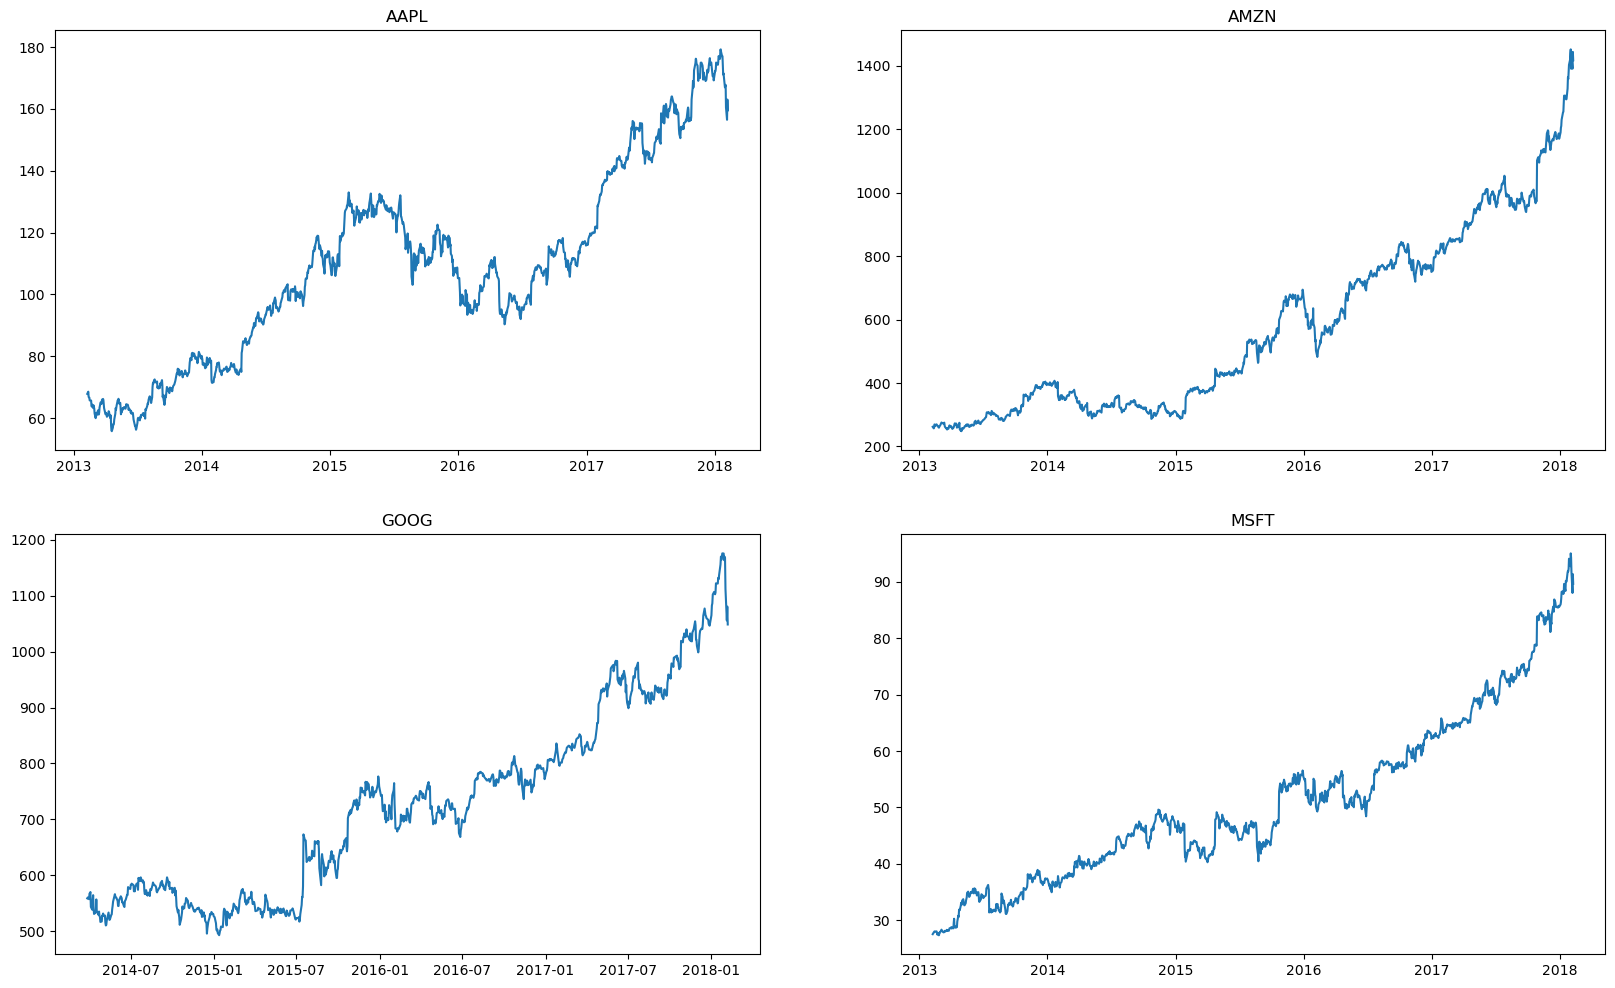

In [16]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1 = df['Name']==company
    fdf=df[filter1]
    plt.plot(fdf['date'], fdf['close'])
    plt.title(company)

# Moving Average Analysis

In [17]:
df['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [18]:
new_data= df.copy()

In [19]:
ma_day= [10,20,50]

for ma in ma_day:
    new_data['close_' + str(ma)] = new_data['close'].rolling(ma).mean()

In [20]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


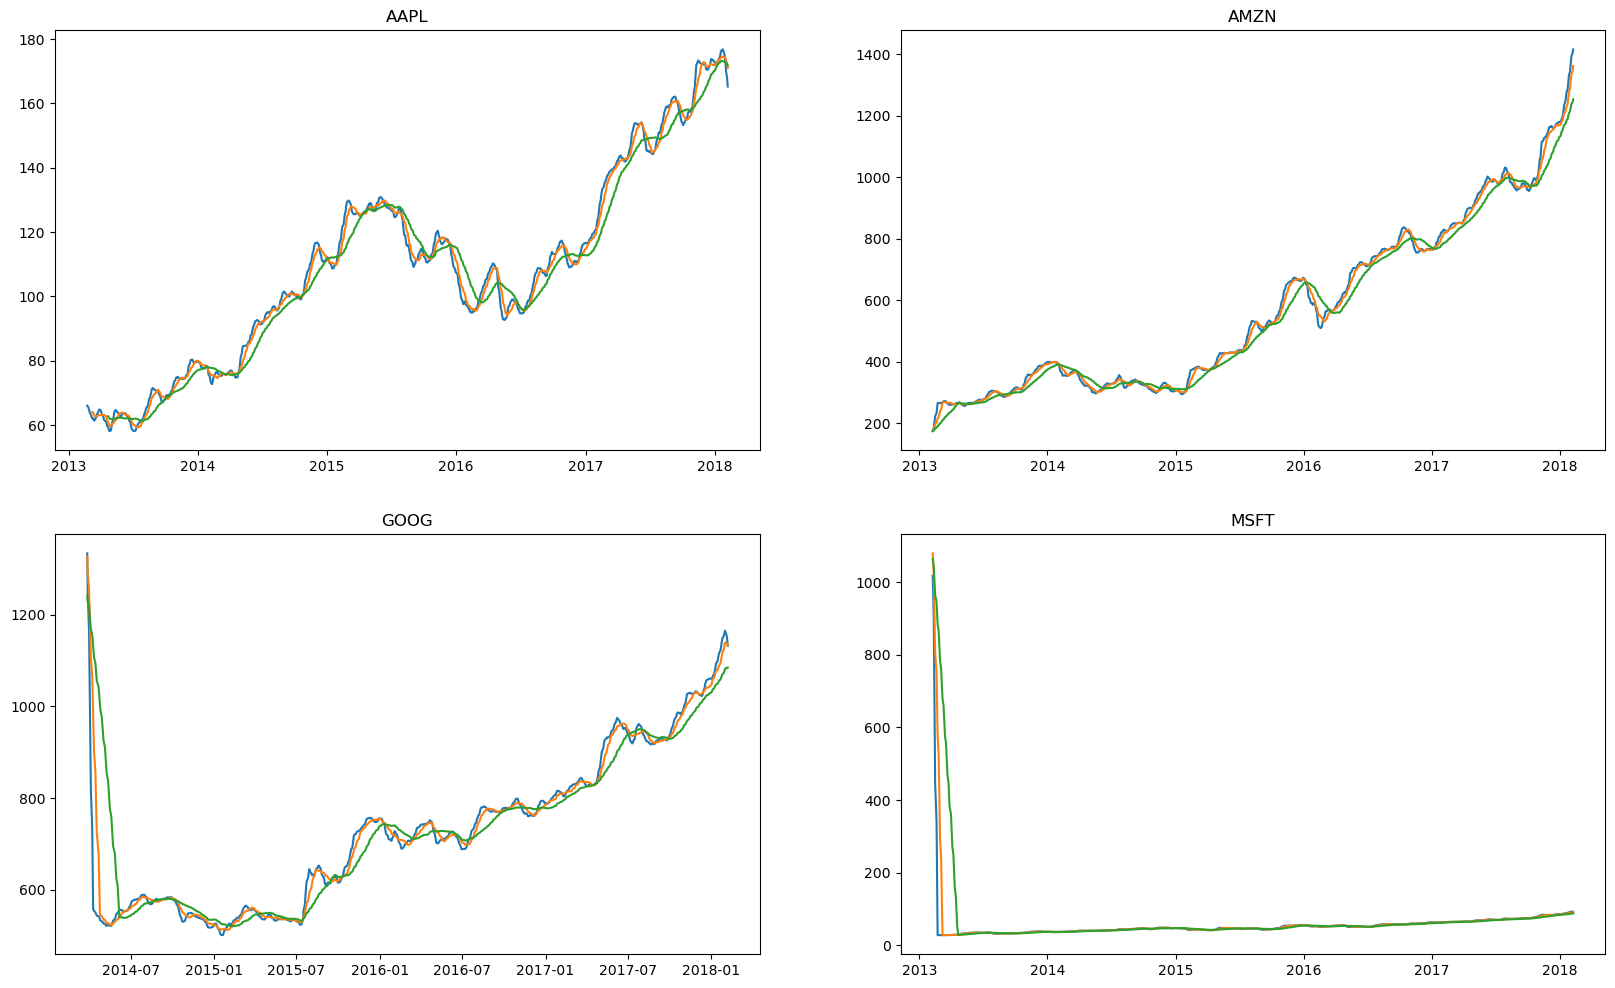

In [21]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name']==company
    fdf=new_data[filter1]
    plt.plot(fdf['date'], fdf['close_10'])
    plt.plot(fdf['date'], fdf['close_20'])
    plt.plot(fdf['date'], fdf['close_50'])
    plt.title(company)

# Daily Returns Analysis of Apple

In [123]:
apple = df[(df['Name']=='AAPL')]

In [124]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [125]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [126]:
apple['Daily return(in %)'] = apple['close'].pct_change()*100

C:\Users\ankit\AppData\Local\Temp\ipykernel_20868\2913090749.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


<Axes: xlabel='date', ylabel='Daily return(in %)'>

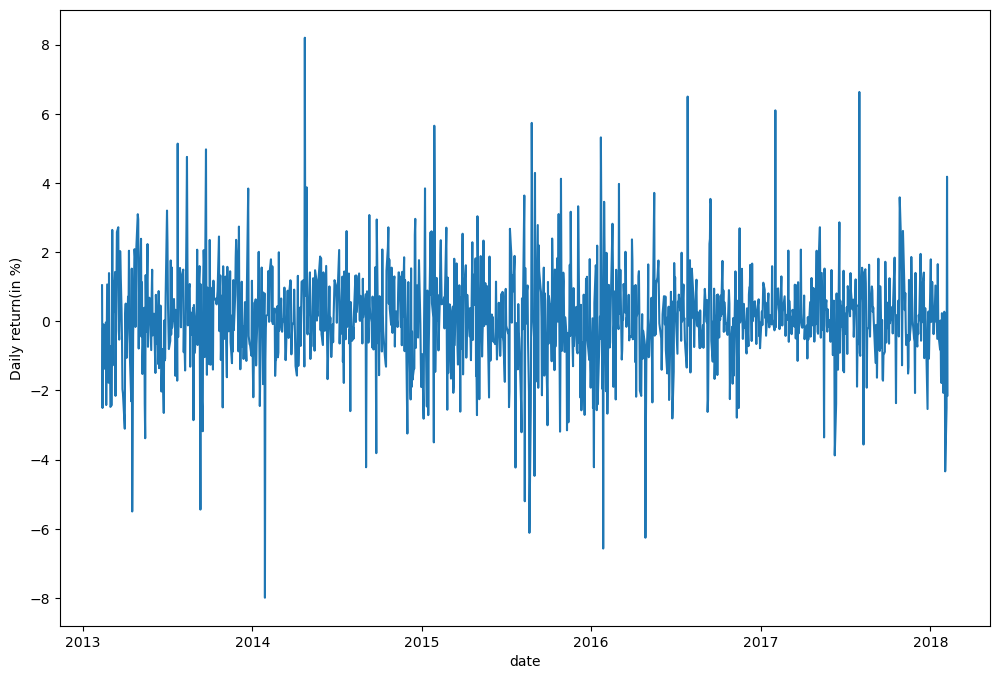

In [132]:
plt.figure(figsize=(12,8))
sns.lineplot(data=apple, x='date', y='Daily return(in %)')

# Resampling Analysis (Monthly, Quarterly & Annualy) of Apple

In [34]:
apple.set_index('date', inplace=True)

In [37]:
apple.head(10)

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,-1.377979
2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,-0.036965
2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,-2.421750
2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL,-0.621633


In [41]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

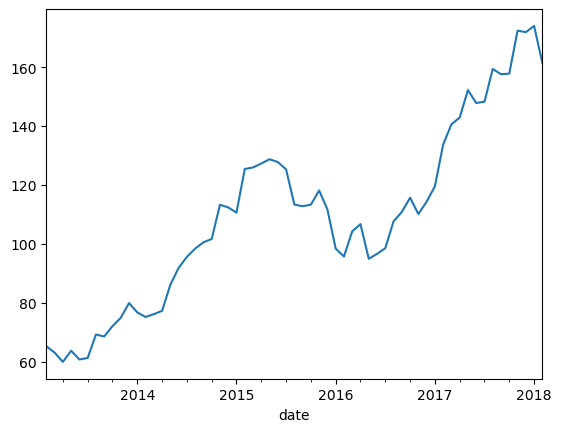

In [42]:
apple['close'].resample('M').mean().plot()

In [43]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

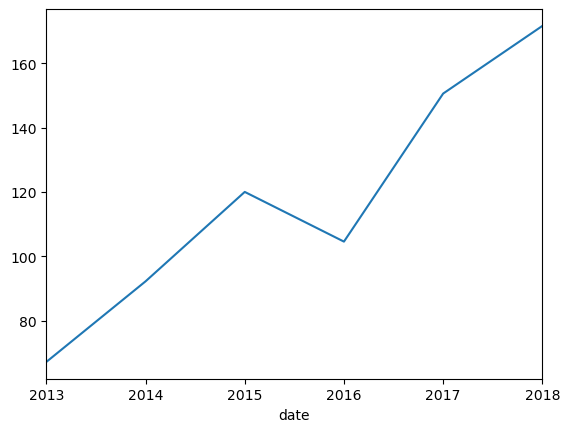

In [44]:
apple['close'].resample('Y').mean().plot()

In [45]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

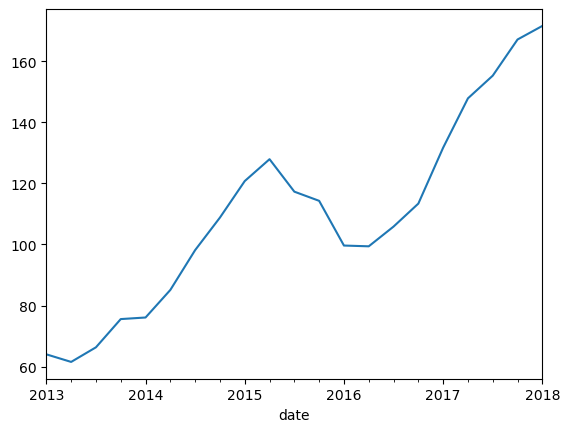

In [46]:
apple['close'].resample('Q').mean().plot()

# Multi-Variate Analysis

In [109]:
aapl=df[(df['Name']=='AAPL')].reset_index(drop=True)
amzn=df[(df['Name']=='AMZN')].reset_index(drop=True)
goog=df[(df['Name']=='GOOG')].reset_index(drop=True)
msft=df[(df['Name']=='MSFT')].reset_index(drop=True)

In [110]:
closing_price= pd.DataFrame()

In [111]:
closing_price['AAPL_close']= aapl['close']
closing_price['AMZN_close']= amzn['close']
closing_price['GOOG_close']= goog['close']
closing_price['MSFT_close']= msft['close']

In [113]:
closing_price.head()

,AAPL_close,AMZN_close,GOOG_close,MSFT_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


In [115]:
closing_price.corr(numeric_only=True)

,AAPL_close,AMZN_close,GOOG_close,MSFT_close
AAPL_close,1.000000,0.819078,0.640522,0.899689
AMZN_close,0.819078,1.000000,0.888456,0.955977
GOOG_close,0.640522,0.888456,1.000000,0.907011
MSFT_close,0.899689,0.955977,0.907011,1.000000


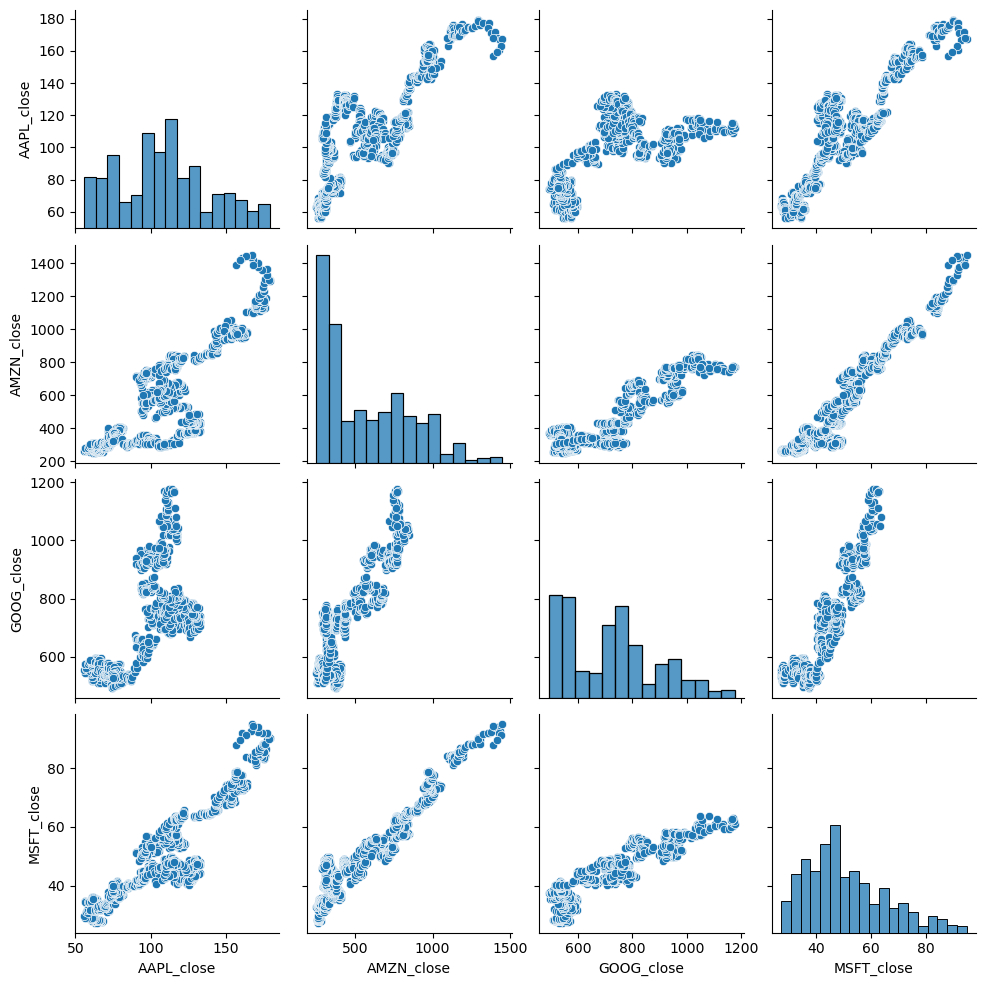

In [114]:
sns.pairplot(closing_price)